<a href="https://colab.research.google.com/github/BotchedPleb/FP-Titanic/blob/main/Case_study_4_Caleb_and_Josue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import pandas as pd

dataset_path = kagglehub.dataset_download("murtadhanajim/vocal-gender-features")

for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, filename)
        break

print("Path to dataset files:", csv_file_path)


df = pd.read_csv(csv_file_path) # Use the path to the CSV file
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/murtadhanajim/vocal-gender-features/versions/4/vocal_gender_features_new.csv


mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0             2247.331739            1158.537748              1870.415462   
1             1790.719889             996.554825              1757.898617   
2             1977.923363            1010.148667              1747.099555   
3             2037.765550            1311.440630              1745.224852   
4             1739.383829            1092.623322              1623.135563   

   std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0              370.405241               21.440710                0.036879   
1              410.710318               21.513383                0.018936   
2              461.458379               20.476283                0.032616   
3              419.056484               19.516014                0.028482   
4              450.088465               20.260620                0.025737   

   mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ...  \
0            4419.438073            0.169241    0.082552   1592.1033  ...   
1            3635.742188            0.108068    0.055477   1112.6351  ...   
2            3873.291016            0.144633    0.060388   1557.5225  ...   
3            3826.584507            0.148933    0.029559   1481.0868  ...   
4            3452.903892            0.117961    0.069078   1424.5352  ...   

   mfcc_9_std  mfcc_10_mean  mfcc_10_std  mfcc_11_mean  mfcc_11_std  \
0   21.736240      2.303085     8.983318    -17.410305     9.115154   
1   13.937135     -0.953942    10.831742     -0.088775    10.297690   
2   14.900779      0.260098    14.031009     -0.420670    10.810292   
3   15.957924     -1.486122    14.461978     -8.479608    12.550333   
4   15.105562     -3.366364    13.943447     -6.561539    11.944948   

   mfcc_12_mean  mfcc_12_std  mfcc_13_mean  mfcc_13_std  label  
0      0.301804    10.452693     -3.080832    10.146248      0  
1     -7.281142    10.926579     -0.450248     8.489134      0  
2     -0.199829    11.986182      3.372986     9.285437      0  
3      3.997028     9.912608     -6.946966    10.574301      0  
4      1.410639    13.110976     -3.252258     9.866687      0  

[5 rows x 44 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score


features=["mean_spectral_centroid", "std_spectral_centroid", "mean_spectral_bandwidth",
           "std_spectral_bandwidth", "mean_spectral_contrast", "mean_spectral_flatness",
           "mean_spectral_rolloff", "zero_crossing_rate", "rms_energy", "mean_pitch",
           "min_pitch", "max_pitch", "std_pitch", "spectral_skew", "spectral_kurtosis",
           "energy_entropy", "log_energy", "mfcc_1_mean", "mfcc_1_std", "mfcc_2_mean",
           "mfcc_2_std", "mfcc_3_mean", "mfcc_3_std", "mfcc_4_mean", "mfcc_4_std", "mfcc_5_mean",
           "mfcc_5_std", "mfcc_6_mean", "mfcc_6_std", "mfcc_7_mean", "mfcc_7_std", "mfcc_8_mean",
           "mfcc_8_std", "mfcc_9_mean", "mfcc_9_std", "mfcc_10_mean", "mfcc_10_std", "mfcc_11_mean",
           "mfcc_11_std", "mfcc_12_mean", "mfcc_12_std", "mfcc_13_mean", "mfcc_13_std"]

features2= ["std_spectral_centroid","std_spectral_bandwidth", "mean_spectral_contrast", "zero_crossing_rate", "rms_energy", "mean_pitch",
           "min_pitch", "spectral_skew", "mfcc_1_mean", "mfcc_1_std", "mfcc_2_mean",
           "mfcc_2_std", "mfcc_3_mean", "mfcc_3_std", "mfcc_4_mean", "mfcc_4_std", "mfcc_5_mean",
           "mfcc_5_std", "mfcc_6_mean", "mfcc_6_std", "mfcc_7_mean", "mfcc_7_std", "mfcc_8_mean",
           "mfcc_8_std", "mfcc_9_mean", "mfcc_9_std", "mfcc_10_mean", "mfcc_10_std", "mfcc_11_mean",
           "mfcc_11_std", "mfcc_12_mean", "mfcc_12_std", "mfcc_13_mean", "mfcc_13_std"]

features3= ["mfcc_1_mean", "mfcc_1_std", "mfcc_2_mean",
           "mfcc_2_std", "mfcc_3_mean", "mfcc_3_std", "mfcc_4_mean", "mfcc_4_std", "mfcc_5_mean",
           "mfcc_5_std", "mfcc_6_mean", "mfcc_6_std", "mfcc_7_mean", "mfcc_7_std", "mfcc_8_mean",
           "mfcc_8_std", "mfcc_9_mean", "mfcc_9_std", "mfcc_10_mean", "mfcc_10_std", "mfcc_11_mean",
           "mfcc_11_std", "mfcc_12_mean", "mfcc_12_std", "mfcc_13_mean", "mfcc_13_std"]



In [ ]:
#Final Model
X = df[features]
y=df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
rf.fit(X, y)
print(rf.oob_score_)

y_pred = rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 # Initialize the RandomForestClassifier with OOB enabled
clf = RandomForestClassifier(oob_score=True, n_estimators=100)
clf.fit(X_train, y_train)

# Get OOB predictions
oob_predictions = clf.oob_decision_function_.argmax(axis=1)

# Calculate precision
precision = precision_score(y_train, oob_predictions, average='weighted')
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_train, oob_predictions, average='weighted')
print(f'Recall: {recall:.2f}')

from sklearn import tree
plt.figure(figsize=(100, 100))
tree.plot_tree(rf.estimators_[0],
               filled=True,
               feature_names=X.columns,
               class_names=True,
               rounded=True)
plt.title("Visualization of One Tree from the Random Forest")
plt.show()

0.9923829576418133
Confusion Matrix:
[[1162    1]
 [   0 2067]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230

Precision: 1.00
Recall: 1.00


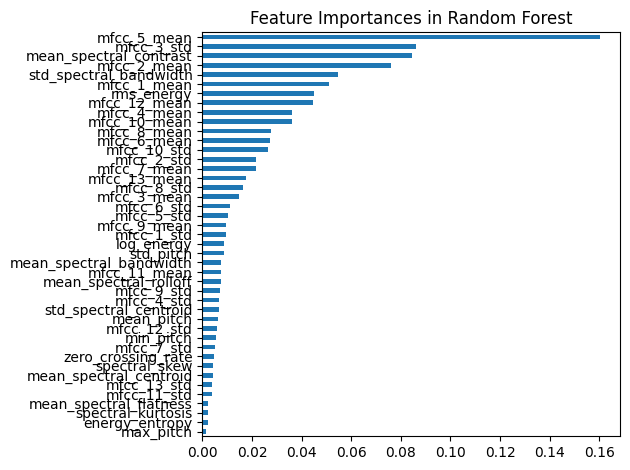

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances in Random Forest")
plt.tight_layout()
plt.show()

In [ ]:
X = df[features2]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
rf.fit(X, y)
print(rf.oob_score_)

y_pred = rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


from sklearn import tree
plt.figure(figsize=(100, 100))
tree.plot_tree(rf.estimators_[0],
               filled=True,
               feature_names=X.columns,
               class_names=True,
               rounded=True)
plt.title("Visualization of One Tree from the Random Forest")
plt.show()

0.9920113945999505
Confusion Matrix:
[[1162    1]
 [   0 2067]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



In [ ]:
X = df[features3]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
rf.fit(X, y)
print(rf.oob_score_)

y_pred = rf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn import tree
plt.figure(figsize=(100, 100))
tree.plot_tree(rf.estimators_[0],
               filled=True,
               feature_names=X.columns,
               class_names=True,
               rounded=True)
plt.title("Visualization of One Tree from the Random Forest")
plt.show()

0.9900916522169928
Confusion Matrix:
[[1163    0]
 [   1 2066]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



Our final model is the first model that we generated. The model included the following features: mean_spectral_centroid, std_spectral_centroid, mean_spectral_bandwidth,std_spectral_bandwidth, mean_spectral_contrast mean_spectral_flatness, mean_spectral_rolloff, zero_crossing_rate, rms_energy, mean_pitch,min_pitch, max_pitch, std_pitch, spectral_skew, spectral_kurtosis, energy_entropy, log_energy, mfcc_1_mean, mfcc_1_std, mfcc_2_mean,
           mfcc_2_std, mfcc_3_mean, mfcc_3_std, mfcc_4_mean, mfcc_4_std, mfcc_5_mean, mfcc_5_std, mfcc_6_mean, mfcc_6_std, mfcc_7_mean, mfcc_7_std, mfcc_8_mean, mfcc_8_std, mfcc_9_mean, mfcc_9_std, mfcc_10_mean, mfcc_10_std, mfcc_11_mean, mfcc_11_std, mfcc_12_mean, mfcc_12_std, mfcc_13_mean, mfcc_13_std.

The accuracy from final our model was 100% and it achieve an OOB score of 0.9923, which has the difference of .0004 from the second highest OOB score.

Overall this model is basically perfect when it comes to predicting whether a voice is male or female since it achieve an accuracy of 100% regardless of how we generated the random forest model.

Ultimately, we chose our first model as our final model since the OOB was the deciding factor in our decision. Not only could we have not choosen it on the other factors on the confusion matrix, but we to rely on how well the model is able to generalize the data which so happened to be our first model. Regardless, it is amazing to see that all the models were insanely accurate no matter what features we changed in the model.
